In [1]:
from utils import *
#Import all the libraries

In [2]:
from Image_loader import ImageDataset
#Dataloader that normalizes and downsizes the original image by half.  

In [3]:
dataset_path = "archive/"
hr_height = 96
hr_width = 96
hr_shape = (hr_height, hr_width)



train_paths = glob.glob(dataset_path + "/DIV2K_train_HR/DIV2K_train_HR/*.*")
test_paths = glob.glob(dataset_path + "DIV2K_valid_HR/DIV2K_valid_HR/*.*")
train_dataloader = DataLoader(ImageDataset(train_paths, hr_shape=hr_shape), batch_size=16, shuffle=True)
test_dataloader = DataLoader(ImageDataset(test_paths, hr_shape=hr_shape), batch_size=1, shuffle=False)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [5]:
from Store_train_data import StoreTrainData
#Stores all the training data on the GPU

In [ ]:
StoreTrainData(train_dataloader,'stacked_dataset.pt')



In [6]:

stacked_dataset = torch.load('stacked_dataset.pt')

In [7]:
from model import TSN,FirstStage

In [8]:
from Edge_Extractor_Net import SobelConvolutionNet

In [9]:
model = TSN().to(device)
model2 = FirstStage().to(device)
model3 = SobelConvolutionNet().to(device)

In [10]:
from Train_loader import Train

In [12]:
## Train the model

criterion = nn.L1Loss()
optimizer = optim.Adam(list(model.parameters()) + list(model2.parameters()) + list(model3.parameters()) , lr=0.001)
num_epochs = 100

Train(stacked_dataset,criterion,optimizer,num_epochs,model,model2,model3)

 25%|████████████████████▎                                                            | 25/100 [00:28<01:16,  1.02s/it]

Epoch [25/100], Loss: 0.7009
Available GPU memory: 7.78 GB


 50%|████████████████████████████████████████▌                                        | 50/100 [00:54<00:50,  1.01s/it]

Epoch [50/100], Loss: 0.4464
Available GPU memory: 7.78 GB


 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [01:19<00:24,  1.01it/s]

Epoch [75/100], Loss: 0.3368
Available GPU memory: 7.78 GB


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:44<00:00,  1.05s/it]

Epoch [100/100], Loss: 0.2921
Available GPU memory: 7.78 GB


In [13]:
##Load the pre-trained model

model.load_state_dict(torch.load('best_model_norm_BN_sobel_small_1.pth'))

<All keys matched successfully>

In [14]:
from Test_loader import Test

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


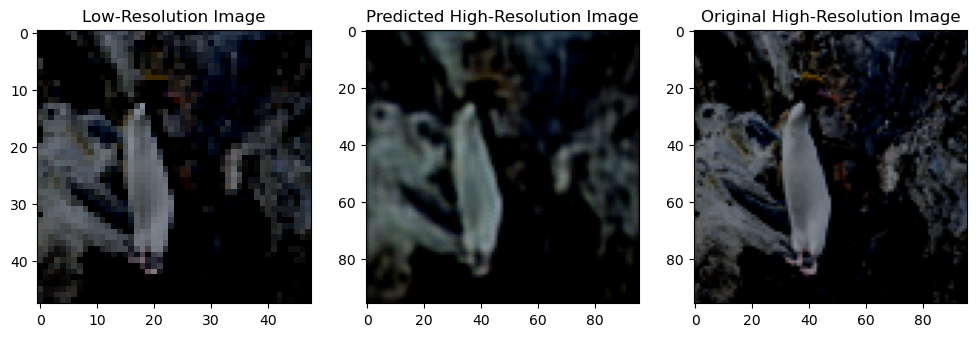

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


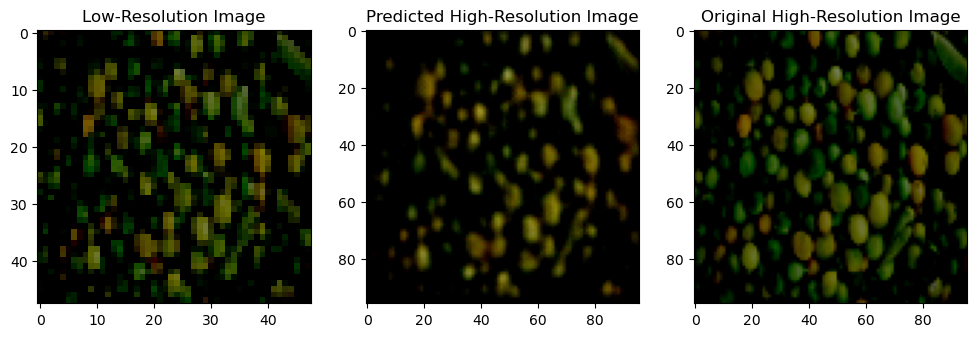

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


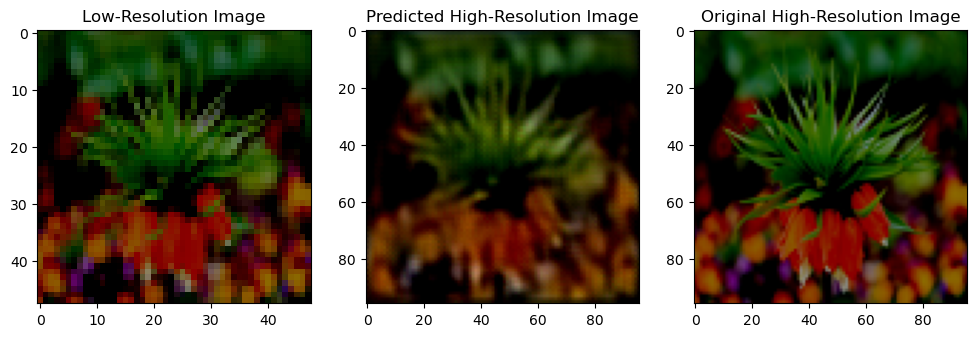

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


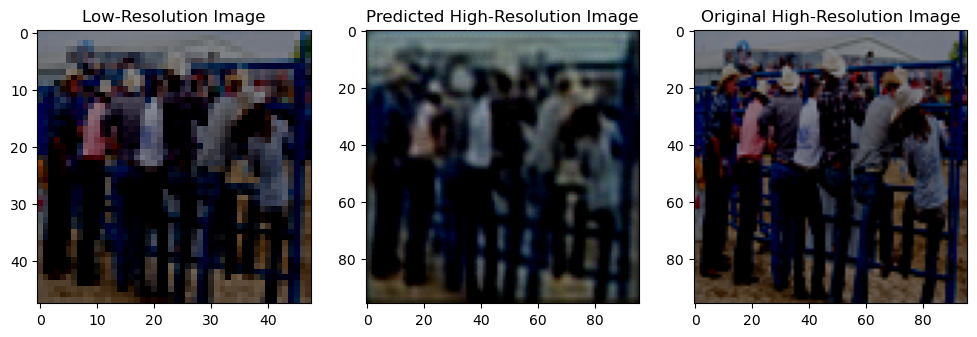

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


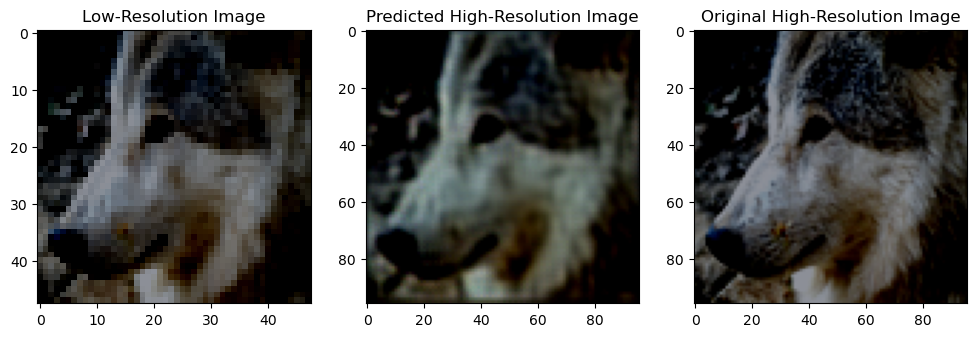

Average PSNR on Test Data: 28.18 dB


In [15]:
Test(test_dataloader,model)